### 使用TensorFlow 辨識手寫數字

In [1]:
! pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/e8/df/d606d07cff0fc8d22abcc54006c0247002d11a7f2d218eb008d48e76851d/protobuf-3.6.1-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/35/6b/11530768cac581a12952a2aad00e1526b89d242d0b9f59534ef6e6a1752f/astor-0.7.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f0/90/520757ccafb14f03e8e46a54bacd45f5f9cca6b96b58b83b66a272f059df/grpcio-1.16.0-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/fc/94/74e0fa783d3fc07e41715973435dd051ca89c550881b3454233c39c73e69/Keras_Preprocessing-1.0.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3f/c4/2ff40221029f7098d58f8d7fb99b97e8100f3293f9856f0fb5834bef100b/Keras_Applications-1.0.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7a/6b/5600647404ba15545ec37d2f7f58844d690baf2f81f3a60b862e48f29287/Markdown-3.0.1-py2.py3-none-any.whl


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:\\Users\\USER", one_hot=True)

C:\ProgramData\Anaconda3_2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\USER\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\USER\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting C:\Users\USER\t10k-images-idx3-ubyte.gz
Extracting C:\Users\USER\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000000DB7A358>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000100BF3C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000000F573400>)

In [4]:
print(dir(mnist))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_fields', '_make', '_replace', '_source', 'count', 'index', 'test', 'train', 'validation']


In [5]:
print(dir(mnist.train))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_epochs_completed', '_images', '_index_in_epoch', '_labels', '_num_examples', 'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples']


In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
sample_image = mnist.train.images[0].reshape((28,28))

Populating the interactive namespace from numpy and matplotlib


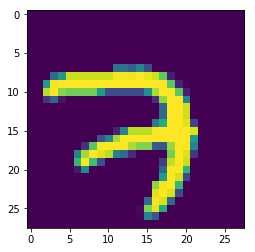

In [9]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(sample_image)

In [10]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### 設定網路參數

In [11]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [12]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

### Placeholders

In [13]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### 建構多層神經網路

In [14]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [15]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [16]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### 建立模型

In [17]:
pred = multilayer_perceptron(x, weights, biases)

### 設定代價函數

In [18]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### 初始化變量

In [19]:
init = tf.global_variables_initializer()

### 訓練模型

In [20]:
Xsamp,ysamp = mnist.train.next_batch(100)

In [21]:
Xsamp.shape

(100, 784)

In [22]:
ysamp.shape

(100, 10)

In [23]:
Xsamp,ysamp = mnist.train.next_batch(1)

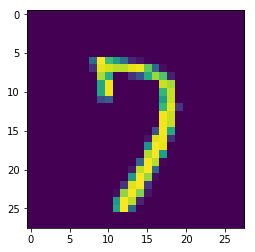

In [24]:

sample_image = Xsamp.reshape((28,28))
plt.imshow(sample_image)

In [25]:
ysamp

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

### 評估模型

In [26]:
y

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

In [27]:
pred

<tf.Tensor 'add_2:0' shape=(?, 10) dtype=float32>

In [28]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [29]:
correct_predictions

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [30]:
correct_predictions = tf.cast(correct_predictions, "float")

In [31]:
accuracy = tf.reduce_mean(correct_predictions)

In [32]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [33]:
# Start the session
with tf.Session() as sess:
    
    # Intialize all the variables
    sess.run(init)

    for epoch in range(training_epochs):

        # Initial the cost = 0.0
        avg_cost = 0.0

        total_batch = int(n_samples/batch_size)

        for i in range(total_batch):

            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

            # Compute average loss
            avg_cost += c / total_batch

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))
    print(accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=162.7127539617364
Epoch: 2 cost=60.175241857008494
Epoch: 3 cost=43.90214457815342
Epoch: 4 cost=35.39966048847546
Epoch: 5 cost=29.56505994363263
Epoch: 6 cost=25.65166115305641
Epoch: 7 cost=22.703955215974272
Epoch: 8 cost=20.195572472919114
Epoch: 9 cost=18.367894876870228
Epoch: 10 cost=16.83057081796907
Epoch: 11 cost=15.625885284163736
Epoch: 12 cost=14.391746202978243
Epoch: 13 cost=13.504779600988734
Epoch: 14 cost=12.501692919216358
Epoch: 15 cost=11.818564327512256
0.9095
Training Completed in 15 Epochs


## TensorBoard

In [6]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:\\Users\\USER", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\USER\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\USER\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting C:\Users\USER\t10k-images-idx3-ubyte.gz
Extracting C:\Users\USER\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [34]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

In [35]:
with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input],   name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

In [36]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

In [37]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

In [38]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

In [39]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [40]:
init = tf.global_variables_initializer()

In [41]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard2/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, result = sess.run([optimizer, cost, merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=166.012001093084
Epoch: 2 cost=60.311729944402494
Epoch: 3 cost=43.98361761613327
Epoch: 4 cost=35.427545705275094
Epoch: 5 cost=29.88471435243432
Epoch: 6 cost=26.094324928196983
Epoch: 7 cost=23.083716003244568
Epoch: 8 cost=20.779412655613665
Epoch: 9 cost=18.91421560352501
Epoch: 10 cost=17.25629793123767
Epoch: 11 cost=15.885236131277953
Epoch: 12 cost=14.752916832620437
Epoch: 13 cost=13.687327390909202
Epoch: 14 cost=12.788714196085936
Epoch: 15 cost=12.0156517796083
Training Completed in 15 Epochs


## Tensorboard
- tensorboard --logdir tensorboard/ --host 127.0.0.1
- http://127.0.0.1:6006/